In [41]:
# Ignore this slide !
import warnings
warnings.filterwarnings("ignore")

# Basics Of Machine Learning 

# We will talk about
#### 1. The Learning Problem
#### 2. Machine Learning 
#### 3. Seven Steps of Machine Learning with Pandas, Seaborn and ScikitLearn
#### 4. Problems with Machine Learning in Industry

# 1. The Learning Problem

#### What is Learning ?

Getting good at doing a task by acquiring knowledge through experience with your existing knowledge.

Learning Multiplication of numbers.
1. Task = Multiplication

2. Knowledge to acquire = How to multiply numbers.

3. Existing knowledge = How to add numbers.

4. Experience gained by = Solving multiplication questions.

#### How to learn ?

Step 1. Take up a task.

Step 2.

![asset\decision.png](assets/decision.png)

# 2. Machine Learning

#### How can we define process of learning for a machine ?

Machines are good at doing maths, lets define learning using maths.

$Y=F_t(x)$

- Our method to solve task $t$ is defined as a function $F_{t}$.
- $Y$ is outcome
- $x$ are the conditions in which we are performing the task $t$.

Lets say, $Y_{actual}$ is the outcome after we performed the task $F_t$ under conditions $x$.



Now there are three possible scenarios-

Lets say, $Y_{expected}$ is Expected outcome.

- Scenario 1. We can EXACTLY tell the the machine what the $Y_{expected}$ are for task $t$ under conditions $x$.
- Scenario 2. We cant EXACTLY tell the machine what $Y_{expected}$ are for task $t$ under conditions $x$ but can point it in the right direction by telling it if the outcomes were right or wrong.
- Scenario 3. We cant tell the machine about the outcomes at all.

- Scenario 1 is Supervised Learning.
- Scenario 2 is Reinforcement Learning.
- Scenario 3 is Unsupervised Learning.

### Some terminology
- The conditions $x$ under which we measure the outcome are called *features*.
- The outcome $Y$ is called *target variable*.
- The function $F_t$ is called *Machine Learning Model* that tries to mimic the actual solution.

## 2.1. Supervised ML
- **Most important**
- Machine learns by minimizing the difference between $Y_{expected}$ and $Y_{actual}$
- examples - Decision Trees, Linear Regression, Logistic Regression, SVM, KNN etc.

## 2.2. Unsupervised ML
- Machine learns by trying to find out relation between examples based on some metric
- examples - K Means, DBSCAN, Heirarchical clustering etc.

## 2.3. Reinforcement ML
- Machine learns by adjusting parameters based on the expected outcome.
- examples - Q Learning (value iteration), QR-DQN etc.

# 3. Seven Steps of Machine Learning

Lets take a problem to solve with Machine Learning,

Predict a student's performance in final exams.

We will be exploring these 7 steps of ML using Python.

### 3.1. Step - 1: Data Collection
Collect examples for our Machine Learning model to learn from.

As trivial as it may seem its **by far** The most important step in machine learning!

- First place to look for data is Kaggle.
- Second is UCI Machine Learning Repository.
- Third is Github.
- Fourth is your best friend a Google Search.
- Still can't find relevant data for your problem ?

    You're out of luck and need to collect data yourself, or pay someone to collect data for you.

The data that we are interested in is at - https://archive.ics.uci.edu/ml/machine-learning-databases/00320/

Just download the zip file containing a csv.

### 3.2. Step - 2: Data Preparation
Filter out the bad examples, convert examples to a format our model can understand, see what all inputs are useful, explore the data (This step involves Data Wrangling and Exploratory Data Analysis)

Our friend in this step is 🐼s (Pandas)

Lets search for csv files using python !

In [11]:
from pathlib import Path

files = Path(".").rglob("student*.csv")

In [12]:
path = next(files)
print(path)

student-mat.csv


Lets read the csv file in a DataFrame !

#### Data.... what ?


A Dataframe is a special type of datastructure that is good at handling tabular data. Pandas is built around this data structure.

In [4]:
import pandas as pd

pd.read_csv(path)

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."
...,...
390,"MS;""M"";20;""U"";""LE3"";""A"";2;2;""services"";""servic..."
391,"MS;""M"";17;""U"";""LE3"";""T"";3;1;""services"";""servic..."
392,"MS;""M"";21;""R"";""GT3"";""T"";1;1;""other"";""other"";""c..."
393,"MS;""M"";18;""R"";""LE3"";""T"";3;2;""services"";""other""..."


#### But... but... the file was COMMA separated !?
No. CSV got its name from the "most commonly" used separator. It can be tabs, semicolons etc. as well. Here its semicolons as we can see.

In [9]:
import pandas as pd

df = pd.read_csv(path, sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### What's all this Mjob, Fjob, famrel, freetime and where are the marks I need to predict !?

Whenever we acquire data from somewhere it has a data explanation associated with it which tells us what are all the fields. The zip that you downloaded had a text file, on opening we can find following content -

```
# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

```

### 3.2.1. Types of Data
Data comes mainly in three types-
1. **Numerical** - eg. some measurements.
    - **Discrete** eg. number of people that dislike facebook.
    - **Continuous** eg. marks obtained by students in exams.
2. **Categorical** - Divides things in categories, eg. Sex - Female or Male.
3. **Ordinal** - Categorical variable with associated priorities, eg. Health Status - 1 for very bad to 5 for very good0

- Numerical Discrete - int
- Numerical Continuous - float
- Categorical - string ( object or category data type in pandas )
- Ordinal - int

Our ML algos are based on maths so we need to convert Categorical data into some sort of numerical representation as well.

This process of mapping categorical data to numerics is called encoding. There are many ways of doing it-

Lets assume we have a caterogical feature called sex that has two categories "F" and "M"

1. Integer encoding - each unique value is mapped to an integer eg. substitute F with 0 and M with 1
2. One hot encoding - create one column for each unique value.
3. Word Embeddings - replacing strings with a vector representation ( used in Natural Language Processing )

### 3.2.2. Exploratory Data Analysis 

#### 3.2.2.1. General EDA

How much data we have?

In [10]:
df.shape

(395, 33)

Do we have any of the data thats missing ?

In [11]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

What types of fields do I have ?

In [12]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Show me a summary of the data, max min values per column, values by quartiles etc.


In [13]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


How to visualize the relationship between variables ?

If variables are numeric we can use lineplots, binned plots ( hexbin, histogram ), scatter plots etc.

Lets onboard one more library for plotting, seaborn.

In [14]:
import seaborn as sns
# ps. import matplotlib to manage figure size
import matplotlib.pyplot as plt

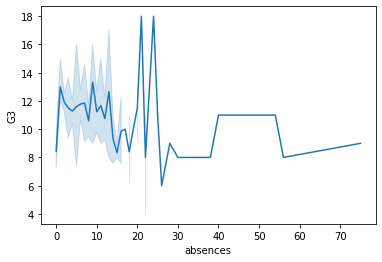

In [15]:
sns.lineplot(x="absences", y="G3", data=df)

If variables are ordinal / categorical we can use barplots, swarm plots, count plots etc.

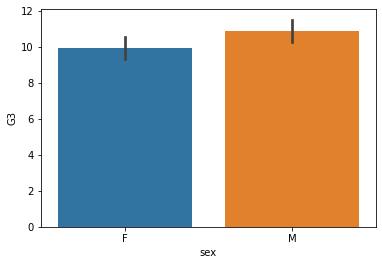

In [16]:
sns.barplot(x="sex", y="G3", data=df)

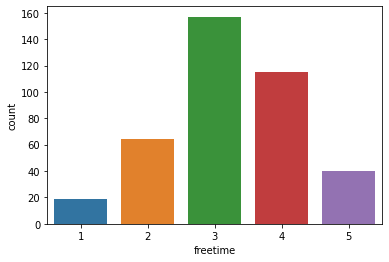

In [17]:
sns.countplot("freetime", data=df)

How to figure out correlation ?

Use heatmaps with pearson's correlation coefficient.

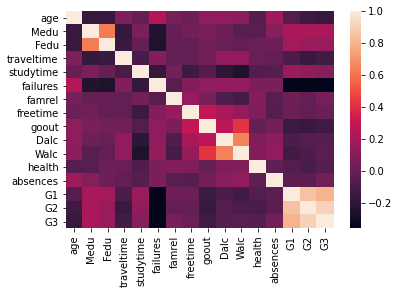

In [18]:
sns.heatmap(df.corr())

We can see that correlation between non numeric fields is not shown, so we should encode them!

1. Integer Encoding

In [19]:
replacement = df.select_dtypes(["object"]).apply(lambda x: x.astype("category").cat.codes, axis="columns")
i_df = df.copy()
i_df[replacement.columns] = replacement
i_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,2,1,18,4,3,0,4,4,5,9,...,4,3,4,1,1,3,6,5,6,6
1,1,0,17,4,2,3,1,1,5,9,...,5,3,3,1,1,3,4,5,5,6
2,1,0,15,4,2,3,1,1,5,8,...,4,3,2,2,3,3,10,7,8,10
3,1,0,15,4,2,3,4,2,5,9,...,3,2,2,1,1,5,2,15,14,15
4,1,0,16,4,2,3,3,3,8,8,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,3,2,20,4,1,0,2,2,8,8,...,5,5,4,4,5,4,11,9,9,9
391,2,1,17,4,0,3,3,1,8,8,...,2,4,5,3,4,2,3,14,16,16
392,2,1,21,3,0,4,1,1,7,7,...,5,5,3,3,3,3,3,10,8,7
393,2,1,18,3,0,4,3,2,9,8,...,4,4,1,3,4,5,0,11,12,10


2. One Hot encoding

In [20]:
o_df = df.copy()
o_df = pd.get_dummies(o_df)
o_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


#### 3.2.2.2. EDA Specific to our problem

Students distribution on final grades.

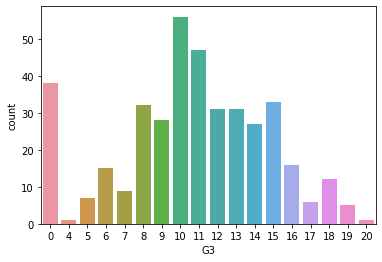

In [21]:
sns.countplot("G3", data=df)

Do students who come daily to the class score higher ?

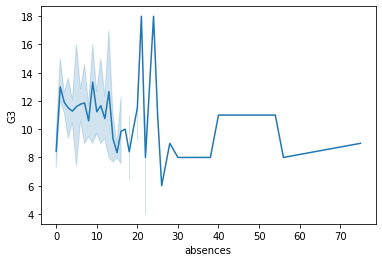

In [22]:
sns.lineplot(x="absences", y="G3", data=df)

Do students who have internet at home score higher ?

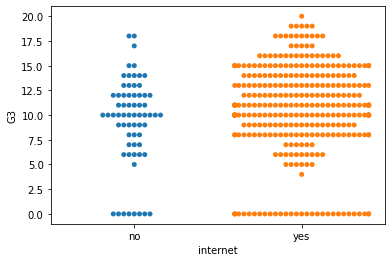

In [23]:
sns.swarmplot(x="internet", y="G3", data=df)

Does romantic relationship effect a student's score ?

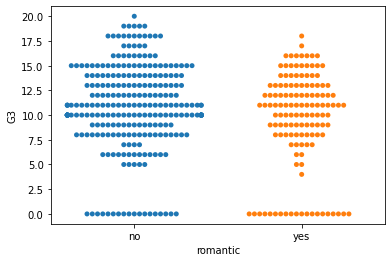

In [24]:
sns.swarmplot(x="romantic", y="G3", data=df)

Do previous grades relate with a student's final grade ?

In [25]:
df[["G1", "G2", "G3"]].corr()["G3"]

G1    0.801468
G2    0.904868
G3    1.000000
Name: G3, dtype: float64

Does parent's education effect student's final grade ?

In [26]:
df[["Mjob", "Fjob", "G3"]].groupby(["Mjob", "Fjob"]).mean()

G3
Mjob     Fjob               
at_home  at_home   12.285714
         health    11.500000
         other      8.878788
         services   8.800000
         teacher    3.000000
health   health    13.500000
         other     11.588235
         services  12.400000
         teacher   11.000000
other    at_home    9.200000
         health    12.000000
         other      9.798077
         services   9.500000
         teacher   11.333333
services at_home    8.166667
         health    10.250000
         other     11.357143
         services  10.767442
         teacher   13.125000
teacher  at_home   11.000000
         health    10.000000
         other     10.761905
         services  10.315789
         teacher   13.083333

Which features are really important for our prediction ?

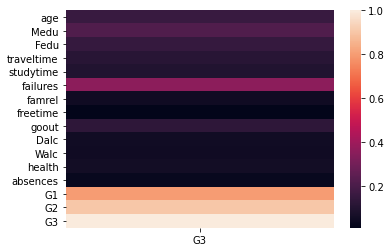

In [27]:
sns.heatmap(abs(df.corr()[["G3"]]))

In [28]:
sum(abs(df.corr()["G3"]) > 0.1)

9

In [29]:
imp_columns = (abs(df.corr()["G3"]) > 0.1).index
imp_columns = list(imp_columns)
imp_columns.remove("G3")
imp_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

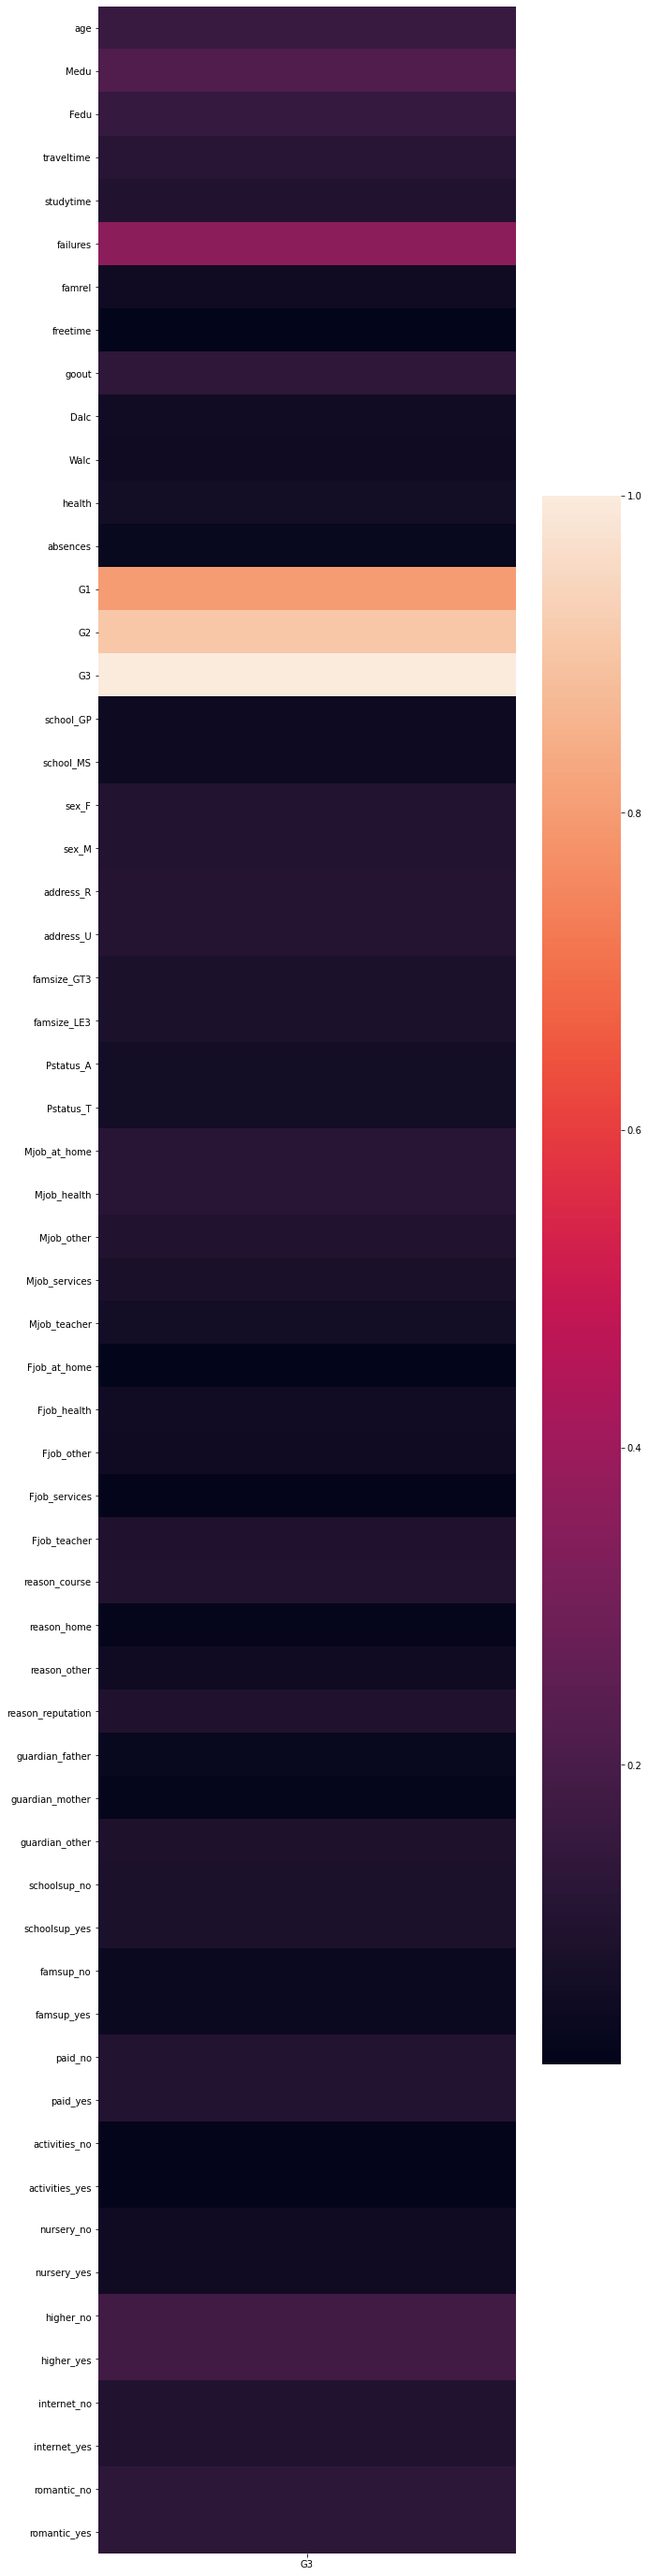

In [30]:
plt.figure(figsize=(10, 50))
sns.heatmap(abs(o_df.corr()[["G3"]]))

In [31]:
sum(abs(o_df.corr()["G3"]) > 0.1)

21

In [32]:
imp_columns = (abs(o_df.corr()["G3"]) > 0.1).index
imp_columns = list(imp_columns)
imp_columns.remove("G3")
imp_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'school_GP',
 'school_MS',
 'sex_F',
 'sex_M',
 'address_R',
 'address_U',
 'famsize_GT3',
 'famsize_LE3',
 'Pstatus_A',
 'Pstatus_T',
 'Mjob_at_home',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_at_home',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_course',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_father',
 'guardian_mother',
 'guardian_other',
 'schoolsup_no',
 'schoolsup_yes',
 'famsup_no',
 'famsup_yes',
 'paid_no',
 'paid_yes',
 'activities_no',
 'activities_yes',
 'nursery_no',
 'nursery_yes',
 'higher_no',
 'higher_yes',
 'internet_no',
 'internet_yes',
 'romantic_no',
 'romantic_yes']

More features to work with not always means our model is going to be better!

### 3.2.3. Splitting data to test and train our model

Randomly splitting the dataframe.

Usually we split the data in 3/4 for training and 1/4 for testing.

Testing involves checking if our model is making predictions that are accurate enough or not.

In [33]:
import numpy as np

data = o_df

mask = np.random.rand(len(data)) < 0.75

train, test = data[mask], data[~mask]

In [34]:
test.shape, train.shape

((103, 59), (292, 59))

Choose your features and prediction variables.

In [35]:
Y = ["G3"]
X = imp_columns

Try filtering your train and test with X and Y columns.

In [36]:
print(train[X].head())
print(test[X].head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   
6   16     2     2           1          2         0       4         4      4   

   Dalc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
1     1  ...              1               0           1            0   
2     2  ...              1               0           0            1   
3     1  ...              0               1           0            1   
4     1  ...              1               0           0            1   
6     1  ...              1               0           0            1   

   higher_no  higher_yes  internet_no  internet_yes  romantic_no  romantic_yes  
1    

#### **NOTE: Look into Feature Selection : Variance Based, Tree Based, Univariate, Model Based ( Lasso, Logistic, SVC etc. )**

### 3.3. Step - 3: Choose a Model

Which kind of problem we have ?

Supervised, Unsupervised or Reinforcement ?

We have the students scores as G3, ie. $Y_{expected}$. Its a supervised problem.

Supervised ML algorithms are divided in two categories -
1. Regression
2. Classification

A problem is Regression problem if target variable is Numerical.

If its Categorical its a classification problem.

So we have a Regression problem at hand as G3 is Numeric.

If we had a problem where student grades were given as A, B, C, D, F where A = 18-20 marks, B = 15-18, C = 11-14 and D = 7 - 10, F = 0 - 7 then it would be a classification problem.

Indeed we can convert our existing problem to a classification problem with a little tweaking of target variable.

Decide what all models you want to try out.

##### Types of ML algorithms:
![image.png](assets/algo-map.png)

#### Credits to Jason Brownlee : www.machinelearningmastery.com

1. Linear Regressor
2. Bayesian Regressor
3. Decision Tree Regressor
4. Random Forest Regressor
5. Support Vector Regressor
6. Nearest Neighbor Regressor
7. Multi Layer Perceptron Regressor


#### **NOTE: Depending on the type of data we can already filter out a lot of machine learning models without even trying them out, but that requires indepth understanding of how the models actually work.**

But wait..

How do we implement all these models..?

Scikit-Learn to the rescue !

Lets try implementing Linear Regression first to familiarize ourselves with the API.

In [38]:
from sklearn.linear_model import LinearRegression

# create model object
model = LinearRegression()

# train the model
model.fit(train[X], train[Y])

# make predictions
predictions = model.predict(test[X])

# test the model
model.score(test[X], test[Y])

0.8327098744141812

Lets get our models now.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

models = [
    LinearRegression(),
    BayesianRidge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

Our models with default parameters are ready.

### 3.4. Step - 4: Train the model

Training just means feeding the examples to a function to let it fine tune its variable coefficients.

*Or in case of Instance based models like KNN to let it create a data structure based on fed examples.*

In [42]:
for model in models:
    model.fit(train[X], train[Y])
else:
    print("Done Training")

Done Training


### 3.5. Step - 5: Evaluate the model

Score using inbuilt model.score mechanism.

This returns us a value between 0 to 1 the higher the value the accurate our model was.

In [43]:
for model in models:
    score = model.score(test[X], test[Y])
    print(model.__class__.__name__, score)

LinearRegression 0.8327098744141812
BayesianRidge 0.857764689993256
DecisionTreeRegressor 0.8261580089479466
RandomForestRegressor 0.9162437565301257
SVR 0.8194377677667807
KNeighborsRegressor 0.8371404077477429
MLPRegressor 0.8560522151811665


But sadly evaluation is not so straight forward.

We need to determine how we want to evaluate our models.

Infact for classification and regression we have completely separate metrics.

We will focus on some metrics commonly used for regression.

#### MAE ( Mean Absolute Error )

$\dfrac{\sum{|Y_{actual} - Y_{expected}|}}{n}$

Use it when you dont want to penalize the model for big errors. ie. If we think that if the value deviates by 2 its exactly twice as bad as deviating by 1.

#### MAPE ( Mean Absolute Percentage Error )

$\dfrac{1}{n} * \sum{\dfrac{{|Y_{actual} - Y_{expected}|}}{Y_{expected}}} * 100$

Use it when we are dealing with forecasting problems. Do not use it if predictions have extremes eg. 0s.

#### RMSE ( Root Mean Squared Error )
$\sqrt{\sum{\dfrac{{(Y_{actual} - Y_{expected})^2}}{n}}}$

Use it when we want to penalize errors having higher deviation more.

For this particular problem MAE is a nice fit.

In [44]:
from sklearn.metrics import mean_absolute_error
predictions = []
for model in models:
    prediction = model.predict(test[X])
    error = mean_absolute_error(test[Y], prediction)
    print(model.__class__.__name__, error)

LinearRegression 1.3369223585406553
BayesianRidge 1.194970337457705
DecisionTreeRegressor 1.1650485436893203
RandomForestRegressor 0.9118446601941749
SVR 1.2159976453231398
KNeighborsRegressor 1.299029126213592
MLPRegressor 1.26229652891065


With default parameters RandomForestRegressor seems to be performing best !

0.899 MAE can be interpreted as-

At an average RandomForestRegressor predicts a value that has a maximum absolute deviation of 0.899 from the actual.

Is our train and test split method good ?

No. We should Cross Validate our results !

Cross Validation means dividing data into multiple parts and training and testing our model on different permutations of the same. A popular technique of the same is K-Fold CV.

Lets implement it in python.

In [45]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from collections import defaultdict

kf = KFold(n_splits=10)

scores = defaultdict(list)

for idx, (train_index, test_index) in enumerate(kf.split(data[X])):
    print("Iteration : ", idx)
    X_train, X_test = data[X].loc[train_index], data[X].loc[test_index]
    y_train, y_test = data[Y].loc[train_index], data[Y].loc[test_index]
    for model in models:
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        print(model.__class__.__name__, score)
        scores[model.__class__.__name__].append(score)
print("#################### MEAN ######################")
for model_key in scores:
    print(model_key, np.array(scores[model_key]).mean())

Iteration :  0
LinearRegression 0.8669490671887384
BayesianRidge 0.8845370247624568
DecisionTreeRegressor 0.8394783044895912
RandomForestRegressor 0.8996406320541761
SVR 0.916389646666874
KNeighborsRegressor 0.8773614246300476
MLPRegressor 0.8704438394298384
Iteration :  1
LinearRegression 0.7536080916686687
BayesianRidge 0.7988261538646988
DecisionTreeRegressor 0.09132007233273054
RandomForestRegressor 0.7831582278481013
SVR 0.8567092948449638
KNeighborsRegressor 0.7226943942133816
MLPRegressor 0.771867846997124
Iteration :  2
LinearRegression 0.9104332592628667
BayesianRidge 0.9252533987768039
DecisionTreeRegressor 0.6700188560653677
RandomForestRegressor 0.8788494657448146
SVR 0.9416325807565609
KNeighborsRegressor 0.7390320553111251
MLPRegressor 0.8786943878720929
Iteration :  3
LinearRegression 0.8506690341219016
BayesianRidge 0.8604289117456785
DecisionTreeRegressor 0.7112865570030831
RandomForestRegressor 0.8432555470406872
SVR 0.7520041647145317
KNeighborsRegressor 0.8345850189

Seems like RandomForestRegressor is indeed doing the best job.

#### **NOTE: Recall, Precision, ROC, AUC, F1-Score, Mean Deviances etc. are many more metrics that should be explored**

### 3.6. Step - 6: HyperParameter Tuning

Every model has some parameters associated with it which control how the model behaves. Modifying these parameters can greatly impact the accuracy of our model. These parameters are called Hyperparameters.

Why Hyperparameters not Parameters ??

Parameters are the coefficients to variables that the model "learns" by training on data.

Hyperparameters define the structure of model and stay constant through out the learning phase of model.

You can't feed more data to a model to make the Hyperparameters more accurate.

So what all Hyperparameters are there?

Hyperparameters vary for each model, lets explore some of the important hyperparameters for RandomForestRegressor.
1. n_estimators - The number of decision trees in a random forest. 
2. max_depth - How deep can a decision tree be in a random forest.

One way of Hyperparameter tuning is GridSearch. Lets implement it in python.

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()
parameters = {
    "n_estimators": [10, 20, 50, 100],
    "max_depth": [1, 2, 5, 10],
}
reg = GridSearchCV(model, parameters)
reg.fit(X_train, y_train)
reg.best_params_

{'max_depth': 10, 'n_estimators': 20}

Lets try to see if it improves the accuracy.

In [47]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np

model = RandomForestRegressor(**reg.best_params_)

kf = KFold(n_splits=10)

scores = []

for idx, (train_index, test_index) in enumerate(kf.split(data[X])):
    print("Iteration : ", idx)
    X_train, X_test = data[X].loc[train_index], data[X].loc[test_index]
    y_train, y_test = data[Y].loc[train_index], data[Y].loc[test_index]
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(model.__class__.__name__, score)
    scores.append(score)
print("#################### MEAN ###########''###########")
print(np.array(scores).mean())

Iteration :  0
RandomForestRegressor 0.8986901222587348
Iteration :  1
RandomForestRegressor 0.7572000071761609
Iteration :  2
RandomForestRegressor 0.9104484594634134
Iteration :  3
RandomForestRegressor 0.827715155765024
Iteration :  4
RandomForestRegressor 0.8284408330529007
Iteration :  5
RandomForestRegressor 0.9284868590228048
Iteration :  6
RandomForestRegressor 0.8666462514243756
Iteration :  7
RandomForestRegressor 0.8407237613677512
Iteration :  8
RandomForestRegressor 0.7355426209944269
Iteration :  9
RandomForestRegressor 0.9306406652121975
#################### MEAN ###########''###########
0.852453473573779


### 3.7. Step - 7: Make Predictions !

#### **NOTE: There are many more steps involved in putting a model to production, explore saving model, sklearn model pipelines, deploying model as  a rest api.**

## 4. Problems with Machine Learning in Industry

100 - 200Gs of data is common in industrial ML applications.

Pandas loads all of the data at once in RAM (unless chunked, but its not that optimized even after chunking).

Then how do I save and load such large amounts of data ??

Use efficient memory mapped storage formats not csvs - HDF5, Parquet, Arrow, Protobufs ! 

Ok but how do I process it ??

1. Parallel processing - Dask !

2. Lazy parallel processing - Vaex !

3. Distributed processing - PySpark !

There are many other options available like pytables, datatables, Flink, Hadoop etc. but above 3 are the most commonly used.

If you are not sure about the choices you are making stick with PySpark.

Look into this cool library to work with sklearn on spark : https://github.com/joblib/joblib-spark

## Closing Remarks.
Where do I actually use Machine Learning, I have heard of Deep Learning, that sounds cool, I can drive cars, create deep fakes and much more with that can Machine Learning do that ?

Deep Learning is a subset of Machine Learning that deals with Neural Networks with a lot of hidden layers, we indeed evaluated one fundamental Neural Network, Multi Layer Perceptron. So technically yeah Machine Learning does all of it.

But the conventional statistical ML models that are associated with Machine Learning are better suited for jobs like predictive maintenance etc. 

Also we don't need to use a Nuclear Bomb in a College fight. 😁

Simpler the model, faster will be evaluation and faster will be solution to your problem.



# That's all Folks !

## Give the repo a star if you liked the content!

## Contact:
### Linkedin: https://www.linkedin.com/in/ashish-shukla-21155850/
### ash2shukla@gmail.com
### +919818611161